In [ ]:
!pip install ultralytics opencv-python matplotlib

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [14]:
model = YOLO("yolo11x.pt")

In [15]:
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

(np.float64(-0.5), np.float64(1299.5), np.float64(955.5), np.float64(-0.5))

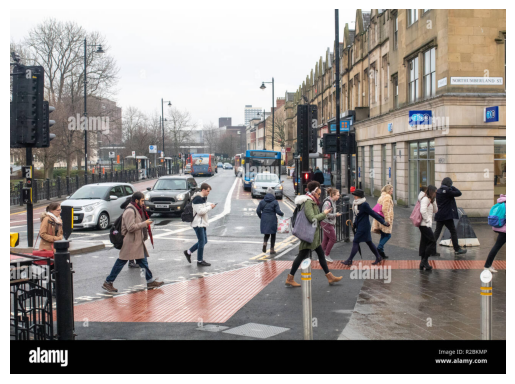

In [16]:
img = cv2.imread("street.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")

In [17]:
results = model(img_rgb)


0: 480x640 11 persons, 4 cars, 3 buss, 2 traffic lights, 4 backpacks, 2 handbags, 3114.1ms
Speed: 7.2ms preprocess, 3114.1ms inference, 3.3ms postprocess per image at shape (1, 3, 480, 640)


(np.float64(-0.5), np.float64(1299.5), np.float64(955.5), np.float64(-0.5))

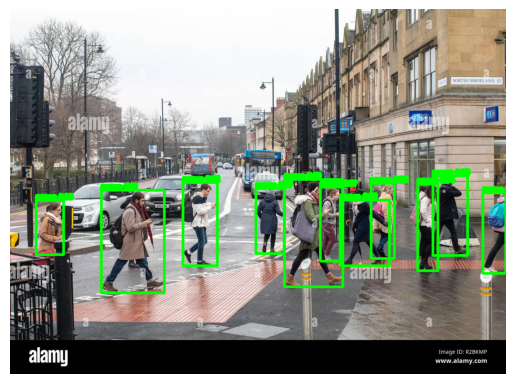

In [18]:
img_draw = img.copy()

for box in results[0].boxes:
    cls = int(box.cls.item())
    conf = float(box.conf.item())

    if model.names[cls] == "person":
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        cv2.rectangle(img_draw, (x1,y1), (x2,y2), (0,255,0), 5)
        cv2.putText(
            img_draw,
            f"person {conf:.2f}",
            (x1, y1 - 5),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0,255,0),
            10
        )

plt.imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB))
plt.axis("off")

(np.float64(-0.5), np.float64(1299.5), np.float64(955.5), np.float64(-0.5))

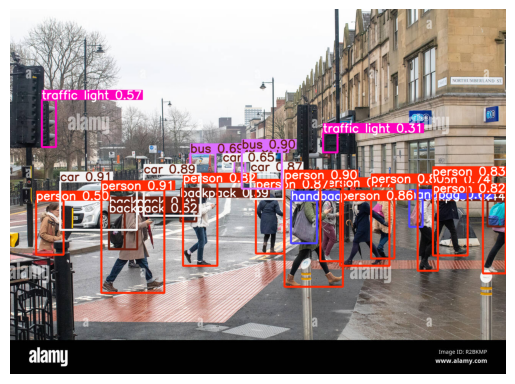

In [19]:
annotated = results[0].plot()
plt.imshow(annotated)
plt.axis("off")

Pedestrian detection on videos

In [20]:
from google.colab.patches import cv2_imshow

In [21]:
cap = cv2.VideoCapture("pedestrian.mp4")


0: 384x640 9 persons, 1 car, 3 traffic lights, 1 backpack, 2 handbags, 1 suitcase, 2453.2ms
Speed: 5.8ms preprocess, 2453.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


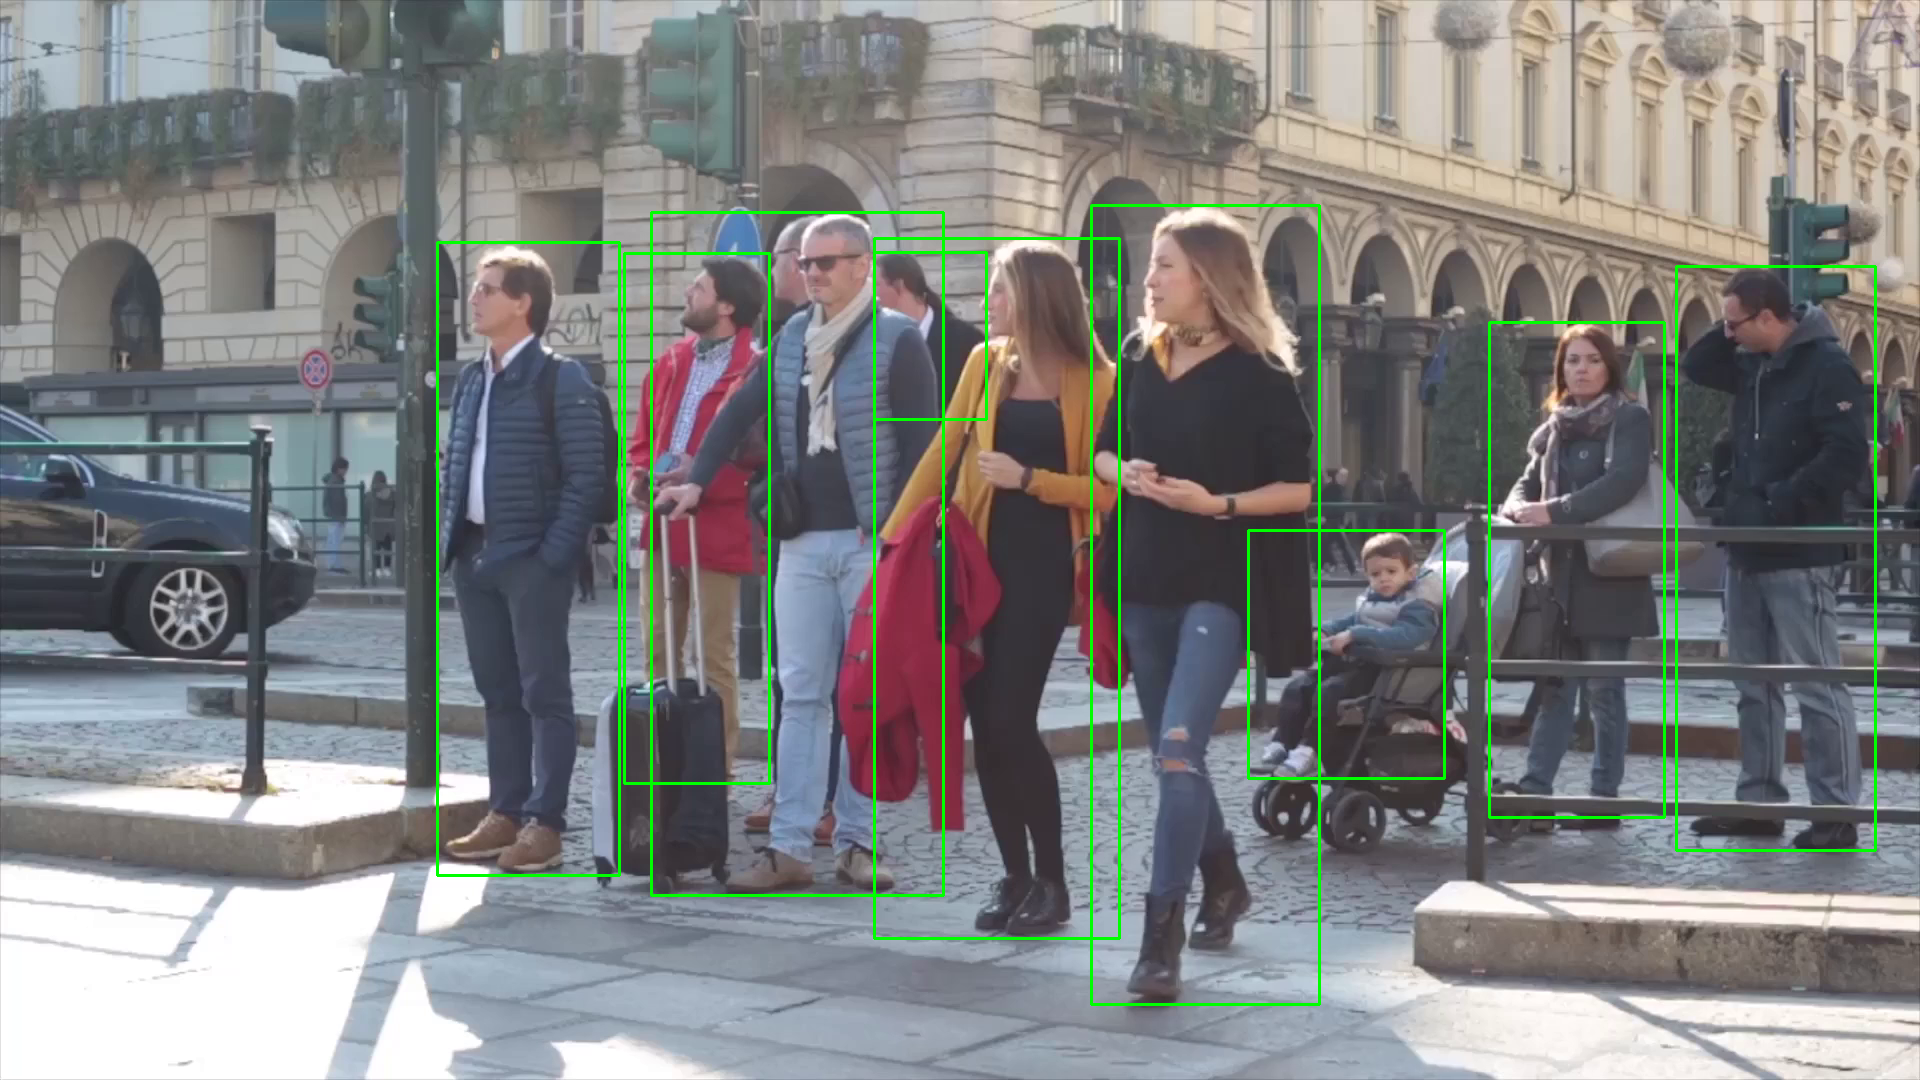


0: 384x640 9 persons, 1 car, 3 traffic lights, 1 backpack, 2 handbags, 1 suitcase, 2680.3ms
Speed: 10.8ms preprocess, 2680.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


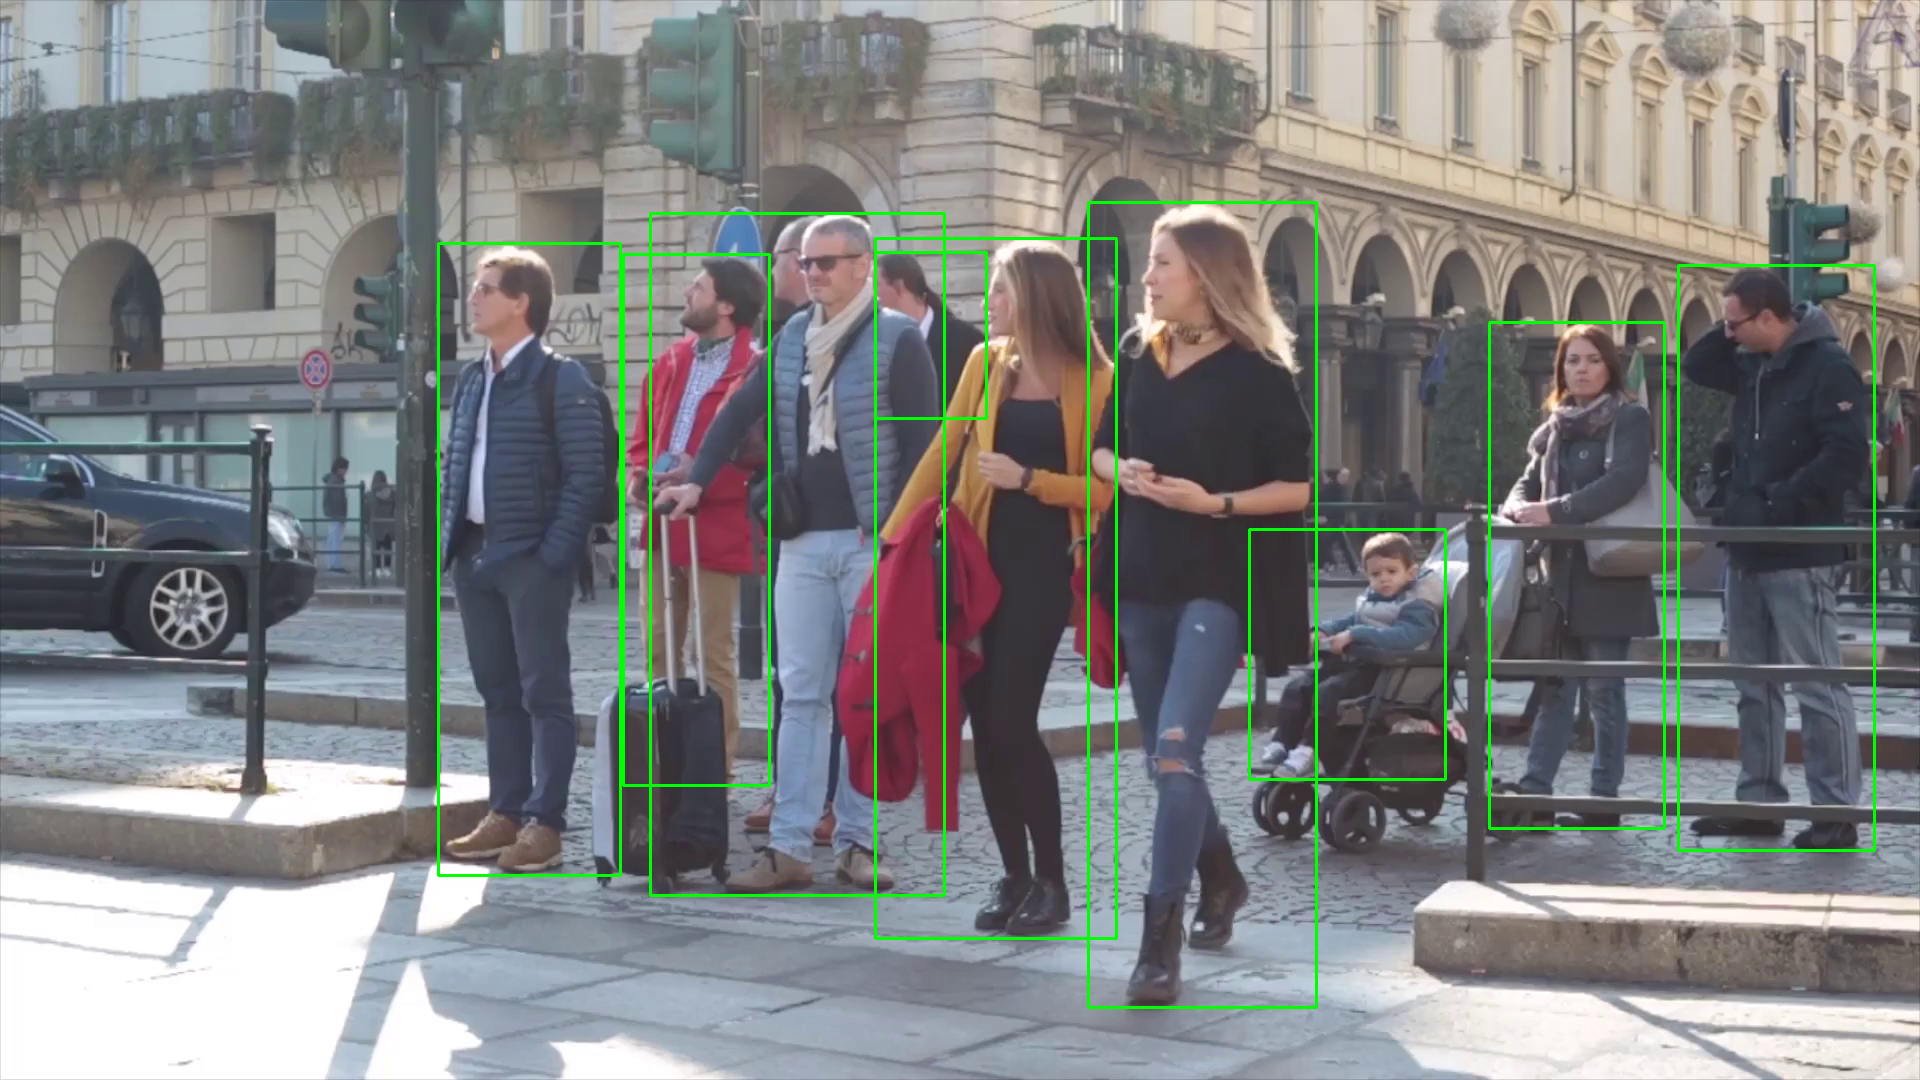


0: 384x640 9 persons, 1 car, 3 traffic lights, 1 backpack, 1 handbag, 1 suitcase, 3775.8ms
Speed: 9.1ms preprocess, 3775.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


KeyboardInterrupt: 

In [22]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame, conf=0.4)

    for r in results:
        for box in r.boxes:
            cls = int(box.cls[0])
            if model.names[cls] == "person":
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cv2.rectangle(frame, (x1,y1), (x2,y2), (0,255,0), 2)

# cv2.imshow("Detected object", frame) if you are using jupyternotebook

    cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
